# Topic Modeling

## Apa itu Topic Modeling?

- Topic modeling adalah metode pembelajaran tak terawasi (**unsupervised** learning), dimana tujuannya adalah untuk mengektrak pola semantik diantara sekumpulan data. Struktur dasar semantik ini dikenal dengan topik
- Tentunya, pertama kali yang dilakukan pada proses topic modeling adalah mengektrak fitur dari kata-kata dalam dokumen-dokumen. Selanjutnya menggunakan struktur matematika dan framework misalkan faktorisasi matrik dan SVD (SIngular Value Decompotition) untuk menentukan kelompok kata kata yang memberikan koherensi semantik yang paling besar.
- Kelompok kata-kata ini membentuk gagasan topik topik.
- Sementara itu, framewrok matematika juga akan menentukan distribusi **topik** ini untuk setiap dokumen.


- Secara singkat , topik modelling adalah:
    - Setiap **dokumen** terdiri dari beberapa  **topik** ( distribusi dari beberapa topik)
    - Setiap topik berkaitan dengan sekumpulan  **kata-kata** (distribusi dari beberapa kata-kata).

## Flowchart untuk  Topic Modeling

![](topicpipeline.jpeg)

## Persiapan Data dan Praproses

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

### Kumpulan dokumen (Corpus)


- Menggunakan 8 dokumen sebagai contoh 

In [2]:
corpus = [
    'The sky is blue and beautiful.', 'Love this blue and beautiful sky!',
    'The quick brown fox jumps over the lazy dog.',
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    'I love green eggs, ham, sausages and bacon!',
    'The brown fox is quick and the blue dog is lazy!',
    'The sky is very blue and the sky is very beautiful today',
    'The dog is lazy but the brown fox is quick!'
]
labels = [
    'weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather',
    'animals'
]

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Praproses  teks (data)

- Bergantung pada dokumen yang diproses, praproses disesuaikan dengan kebutuhan terhadap kumpulan data tersebut
- Pada contoh dilakukan beberapa proses:
    - menghilangkan simbol dan  tanda baca
    - menormalisasi huruf (case folding)
    - menghapus spasi  yang tidak perlu/berlebihan
    - menghilangkan stopword


tambahan praproses teks jika diperlukan:
- menghilangkan  tanda hubung
- Stemming
- Menghilangkan kata-kata yang tidak ada di wordnet
- Melakukan pembakuan kata


In [3]:
import nltk
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokeanize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mulaab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

- The `norm_corpus` akan dijadikan sebagai input untuk langkah selanjutnya yaitu vektorisasi text.

## Vektorisasi teks

### Model Bag of Words 

- Pada  topic modeling, cara paling sederhana vektorisasi teks adalah membentuka fitur berbasis model Bag-of-Words .
- Ciri dari model  BOW
    - membentuk vektorisasi teks kedalam representasi merik menggunakan daftar banyaknya kemunculan kata 
    - Urutan kata yang  dalam teks diabaikan.
    
- Gunakan vektorisasi berbasi  **jumlah** pada  topik modeling karena sebagian besar topik modelling menggunakan pembobotan dalam proses komputasinya

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [6]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [7]:
# Mendapatkan kata-kata dari corpus
vocab = cv.get_feature_names()
# menampilkan vektor  dokumen-fitur
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Latent Dirichlet Allocation

###  LDA (Latent Dirichlet  Allocation)

- Latent Dirichlet [diʀiˈkleː] Allocation mempelajari hubungan antara  **kosa kata**, **topik**, and **dokumen** dengan mengasumsikan suatu dokumen dibuat dengan model probabilitas tertentu.
- Topik pada LDA adalah berdistribusi multinomial distribution terhadap kosa kata-kosa kata  dari kumpulan dokumen (corpus). (Suatu topik tertentu, dinyatakan dengan kosakata-kosatakat tertentu)

- Dengan LDA kita tahu:
    - Kosa kata apa yang lebih memungkinkan terkait dengan topik tertentu? (Topic by Word Matrix)
    - Topik-topik yang mana yang lebih memungkinkan terkait dengan suatu dokumen tertentu? (Document by Topic Matrix)
    

- Untuk menginterpretasikan topik dalam LDA, kita memperhatikan daftar peringkat dkata-kata yang paling mungkin (N teratas) dalam topik itu.
- Kata-kata umum dalam korpus yang sering muncul pada  bagian atas kata untuk setiap topik, yang terkadang membuat sulit untuk membedakan arti dari topik ini.
- Saat memperhatikan peringkat kata untuk setiap topik, kita dapat menggunakan dua jenis informasi yang disediakan oleh LDA:
    - Frekuensi kata-kata pada setiap topik
    - Eksklusivitas kata-kata terhadap topik (yaitu, sejauh mana kata itu muncul dalam topik tertentu dengan mengesampingkan yang lain).

### Membangun model LDA 

- Mengunakan `CountVectorizer`, tidak menggunakan`TfidfVectorizer` karena  LDA didasarkan pada jumlah kata dan jumlah dokumen. 


In [8]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
doc_topic_matrix = lda.fit_transform(cv_matrix)

Wall time: 15.2 s


In [9]:
import tmplot as tmp
import pickle as pkl
import pandas as pd

In [10]:
phi = tmp.get_phi(doc_topic_matrix)
print(phi)

None


### Ukuran performansi Model 

- Uji model menggunakan  **perplexity** dan **log-likelihood**.
    - Semakin tinggi log-likelihood, semakin baik.
    - Semakin rendah perplexity, semakin baik .
    
    $$
    \mathcal L (\boldsymbol w)
    = \log p(\boldsymbol w | \boldsymbol \Phi, \alpha)
    = \sum_d \log p(\boldsymbol w_d | \boldsymbol \Phi, \alpha).
    $$
    
    
    $$
    \text{perplexity}(\text{test set } w) =
        \exp \left\{
        - \frac{\mathcal L( w)}{\text{count of tokens}}
        \right\}
    $$
    
    
        
    lihat referensi http://qpleple.com/perplexity-to-evaluate-topic-models/

In [11]:
# log-likelihood
print(lda.score(cv_matrix))
# perplexity
print(lda.perplexity(cv_matrix))

-138.91263303644246
25.29296641284209


## Interpretasi

- Untuk menginterpretasikan dengan benar hasil yang diberikan oleh LDA, kita perlu mendapatkan dua matriks penting:
    - Matrik **Document-by-Topic** : ini adalah matriks yang dikembalikan oleh `LatentDirichletAllocation`  ketika menggunakan model `fit_transform()` pada data.
    - Matrik **Word-by-Topic**: Kami dapat mengambil matriks ini dari hasil LatentDirichletAllocation.components

### Matrik Document-by-Topic 

- Pada matrik **Document-by-Topic** , dapat dilihat bagaiman setiap dokumen terkait dengan suatu topik-topik
- Tentunya, nilainya menyatakan nilai probabilitas dokumen terhadapa topik tertentu

In [12]:
## doc-topic matrix
doc_topic_df = pd.DataFrame(doc_topic_matrix, columns=['T1', 'T2', 'T3'])
doc_topic_df

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


### Matrik Topic-by-Word

- Pada matrik  **Topic-by-Word** , dapat dilihat bagaiman masing masing topik berkaitan degan setiap kata-kata dalam  BOW.
- Tentunya,  nilainya  menyatakan pentingnya suatu kata terhadap masing masing topik 

In [13]:
topic_word_matrix = lda.components_

In [16]:
pd.DataFrame(topic_word_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.333699,0.333647,3.332365,3.373774,0.333647,0.333891,0.333891,0.333699,0.333891,0.333793,0.333699,0.333814,0.333647,0.333891,1.330416,0.333891,0.333699,4.332439,0.333647,1.332558
1,2.332696,1.332774,0.333853,0.334283,1.332774,0.333761,0.333761,2.332696,0.333761,1.332543,2.332696,0.333767,1.332774,0.333761,1.335461,0.333761,2.332696,0.333812,1.332774,0.333744
2,0.333606,0.333579,0.333782,1.291942,0.333579,3.332347,3.332347,0.333606,3.332347,0.333664,0.333606,1.332419,0.333579,3.332347,0.334123,3.332347,0.333606,0.333749,0.333579,0.333698


- Kita lakukan transport matrik dari data diatas untuk mempermudah analisanya

In [18]:
pd.DataFrame(np.transpose(topic_word_matrix), index=vocab)

,0,1,2
bacon,0.333699,2.332696,0.333606
beans,0.333647,1.332774,0.333579
beautiful,3.332365,0.333853,0.333782
blue,3.373774,0.334283,1.291942
breakfast,0.333647,1.332774,0.333579
brown,0.333891,0.333761,3.332347
dog,0.333891,0.333761,3.332347
eggs,0.333699,2.332696,0.333606
fox,0.333891,0.333761,3.332347
green,0.333793,1.332543,0.333664


### Interpretasi makna  Topik

- Ini adalah langkah mendasar dalam topic modeling.LDA tidak memberikan label untuk setiap topik
- Seorang Analislah yang menentukan makna topik..
- Keputusan ini didasarkan pada kata-kata pada masing masing topik yang memperlihatkan bobot penting yang paling tinggi 

In [19]:
## This function sorts the words importances under each topic
## and the selectional criteria include (a) ranks based on weights, or (b) cutoff on weights
def get_topics_meanings(tw_m,
                        vocab,
                        display_weights=False,
                        topn=5,
                        weight_cutoff=0.6):
    for i, topic_weights in enumerate(tw_m):  ## for each topic row
        topic = [(token, np.round(weight, 2))
                 for token, weight in zip(vocab, topic_weights)
                 ]  ## zip (word, importance_weight)
        topic = sorted(topic,
                       key=lambda x: -x[1])  ## rank words according to weights
        if display_weights:
            topic = [item for item in topic if item[1] > weight_cutoff
                     ]  ## output words whose weights > 0.6
            print(f"Topic #{i} :\n{topic}")
            print("=" * 20)
        else:
            topic_topn = topic[:topn]
            topic_topn = ' '.join([word for word, weight in topic_topn])
            print(f"Topic #{i} :\n{topic_topn}")
            print('=' * 20)

- Untuk menggunakan fungsi diatas :
  - Jika kita ingin menampilkan bobot  kata-kata, maka kita perlu menetapkan  `weight_cutoff`.
  - JIka akan menampilkan hanya N kata teratas, maka kita tetapkan dengan  `topn`.

In [20]:
get_topics_meanings(topic_word_matrix,
                    vocab,
                    display_weights=True,
                    weight_cutoff=2)

Topic #0 :
[('sky', 4.33), ('blue', 3.37), ('beautiful', 3.33)]
Topic #1 :
[('bacon', 2.33), ('eggs', 2.33), ('ham', 2.33), ('sausages', 2.33)]
Topic #2 :
[('brown', 3.33), ('dog', 3.33), ('fox', 3.33), ('lazy', 3.33), ('quick', 3.33)]


In [54]:
get_topics_meanings(topic_word_matrix, vocab, display_weights=False, topn=3)

Topic #0 :
sky blue beautiful
Topic #1 :
bacon eggs ham
Topic #2 :
brown dog fox


## Topik topik dalam dokumen-dokumen

- Setelah kita, menentukan makna topik, kita dapat menganalisa bagaimana masing masing dokumen terkait dengan topik topik
- Perhatikan matrik **Document-by-Topic** 

In [21]:
topics = ['weather', 'food', 'animal']
doc_topic_df.columns = topics
doc_topic_df['corpus'] = norm_corpus
doc_topic_df

,weather,food,animal,corpus
0,0.832191,0.083480,0.084329,sky blue beautiful
1,0.863554,0.069100,0.067346,love blue beautiful sky
2,0.047794,0.047776,0.904430,quick brown fox jumps lazy dog
3,0.037243,0.925559,0.037198,kings breakfast sausages ham bacon eggs toast beans
4,0.049121,0.903076,0.047802,love green eggs ham sausages bacon
5,0.054902,0.047778,0.897321,brown fox quick blue dog lazy
6,0.888287,0.055697,0.056016,sky blue sky beautiful today
7,0.055704,0.055689,0.888607,dog lazy brown fox quick


- Kita dapat memvisualisasikan distribusi topik untuk setiap dokumen 

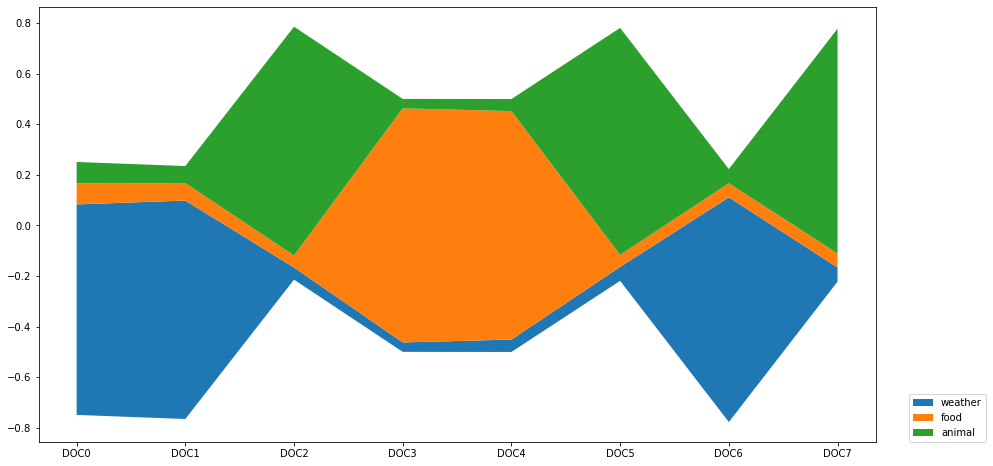

In [22]:
x_axis = ['DOC' + str(i) for i in range(len(norm_corpus))]
y_axis = doc_topic_df[['weather', 'food', 'animal']]

fig, ax = plt.subplots(figsize=(15, 8))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04, 0))

## Melakukan pengelopokkan Clustering dokuemn menggunakan fitur  topic modeling

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_topic_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Prediksi Topik

- Model yang sudah dibuat dapat digunakan untuk memprediksi topik pada dokumen baru

In [24]:
new_texts = ['The sky is so blue', 'Love burger with ham']

new_texts_norm = normalize_corpus(new_texts)
new_texts_cv = cv.transform(new_texts_norm)
new_texts_cv.shape

(2, 20)

In [26]:
new_texts_doc_topic_matrix = lda.transform(new_texts_cv)
topics = ['weather', 'food', 'animal']
new_texts_doc_topic_df = pd.DataFrame(new_texts_doc_topic_matrix,
                                      columns=topics)
new_texts_doc_topic_df['predicted_topic'] = [
    topics[i] for i in np.argmax(new_texts_doc_topic_df.values, axis=1)
]

new_texts_doc_topic_df['corpus'] = new_texts_norm
new_texts_doc_topic_df

,weather,food,animal,predicted_topic,corpus
0,0.775601,0.111301,0.113098,weather,sky blue
1,0.123415,0.764965,0.111620,food,love burger ham


## Evaluasi topik modelling

- The following codes demonstrate how to find the optimal topic number based on the coherence scores of the topic models.

## Refensi

- Sarkar (2019), Chapter 6: Text Summarization and Topic Models